In [107]:
from glob import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from random import choice
plt.rcParams['figure.figsize'] = [8, 8]

# A Comparative Stylometry of Katherine Mansfield Stories

What I've done in the background here is created individual text files for each of the Katherine Mansfield stories that we've read, and I've put them all in a directory called `Texts`. I'll just change into that directory first:

In [108]:
%cd ../Texts

/home/jon/Code/course-computational-literary-analysis/Texts


Now I'll just make sure all the texts are there: 

In [109]:
%ls

daughters.md  first-ball.md          ma-parker.md  stranger.md  young.md
dove.md       garden-party-story.md  marriage.md   voyage.md


And finally I'll use the `glob()` function from the `glob` library to get a list of all `.md` files. I have to sort them alphabetically, just in case blob doesn't care about their order. 

In [110]:
mansfieldStories = [open(story).read() for story in sorted(glob('*.md'))]

Now I'll generate labels from the filenames, since we'll need labels to label the points on the plot we're creating. 

In [111]:
mansfieldLabels = [story[:-3] for story in sorted(glob('*.md'))]
mansfieldLabels

['daughters',
 'dove',
 'first-ball',
 'garden-party-story',
 'ma-parker',
 'marriage',
 'stranger',
 'voyage',
 'young']

In [112]:
mansfieldLabels = ["Daughters of the Late", "Mr and Mrs Dove", 'Her First Ball', 
                   'The Garden Party', 'Life of Ma Parker', 'Marriage a la Mode', 
                   'The Stranger', 'The Voyage', 'The Young Girl']

Peek at the first 200 characters of each one, to make sure everything is as expected: 

In [113]:
[story[:200] for story in mansfieldStories]

['\n\nChapter 3.I.\n------------\n\nThe week after was one of the busiest weeks of their lives. Even when\nthey went to bed it was only their bodies that lay down and rested;\ntheir minds went on, thinking thi',
 "\n4. MR. AND MRS. DOVE.\n---------------------\n\nOf course he knew---no man better---that he hadn't a ghost of a chance,\nhe hadn't an earthly. The very idea of such a thing was preposterous.\nSo preposter",
 '\n\n10. HER FIRST BALL.\n-------------------\n\nExactly when the ball began Leila would have found it hard to say.\nPerhaps her first real partner was the cab. It did not matter that she\nshared the cab with',
 '2. THE GARDEN PARTY.\n--------------------\n\nAnd after all the weather was ideal. They could not have had a more\nperfect day for a garden-party if they had ordered it. Windless, warm,\nthe sky without a ',
 '\n6. LIFE OF MA PARKER.\n---------------------\n\nWhen the literary gentleman, whose flat old Ma Parker cleaned every\nTuesday, opened the door to her th

And check their respective lengths, to see if we can adjust those somehow. 

In [114]:
[len(story) for story in mansfieldStories]

[40291, 18347, 14225, 30014, 13713, 21669, 24910, 17373, 12000]

In [115]:
min([len(story) for story in mansfieldStories])

12000

In [116]:
mansfieldStories = [story[:13000] for story in mansfieldStories[:-1]]

Let's remove the last one, and truncate each story to 13,000 characters, so that we're comparing the same amount of text in each, roughly speaking. 

In [117]:
[len(story) for story in mansfieldStories]

[13000, 13000, 13000, 13000, 13000, 13000, 13000, 13000]

And let's not forget to remove the last label, too.

In [118]:
mansfieldLabels = mansfieldLabels[:-1]

Now we can initialize our vectorizer (just the thing that counts all the words, in this case). We have to give it all the options we want to set here. Here I'm turning off IDF (i.e. not adjusting for the frequency with which each word occurs in the corpus), and I'm limiting the matrix to the top 800 most frequent words.

In [119]:
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

Next, calculate the term frequencies of each word in these stories, and make the resulting matrix dense: 

In [120]:
tf = tfidf.fit_transform(mansfieldStories).todense()

Reduce the dimensions to 2 using PCA, so we can plot it: 

In [121]:
pca = PCA(n_components=2)

In [122]:
pcaOut = pca.fit_transform(tf)

And finally plot our results: 

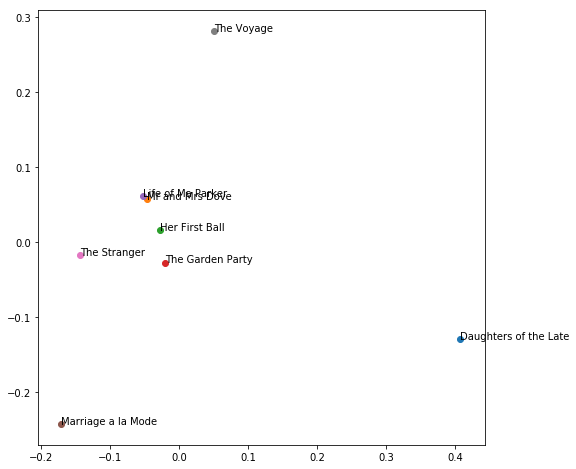

In [123]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(mansfieldLabels[i], (xs[i], ys[i]))

If we tweak the parameters a bit, we can see different textual similarities. For instance, if we adjust the `min_df` and `max_df`, we can specify that we want to see words that occur in at least 2 stories (which will ignore most names and other story-specific words), and not words that occur in more than 50% of stories (which will ignore function words). This will give us mostly content words that are specific to each story. By turning on IDF, we can adjust each frequency for how often they occur in the corpus, accentuating this slicing methos: 

In [124]:
tfidf = TfidfVectorizer(use_idf=True, 
                        stop_words='english', min_df=2, max_df=.5)

In [125]:
tf = tfidf.fit_transform(mansfieldStories).todense()

In [126]:
wordLabels = tfidf.get_feature_names()

In [127]:
df = pd.DataFrame(tf, index=mansfieldLabels, columns=wordLabels)

In [128]:
pcaOut = pca.fit_transform(tf)

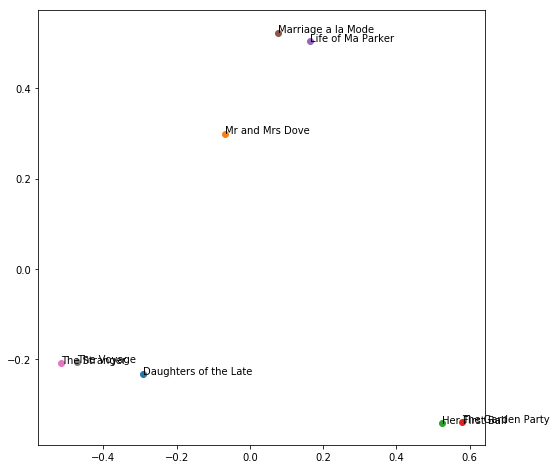

In [129]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(mansfieldLabels[i], (xs[i], ys[i]))

## Adding in word/theme annotations

In addition to plotting each of these stories, we can create new "stories" which only contain words from some themes we're interested in. Then we can see where our stories fall in relation to these theme documents.

In [130]:
marriageWords = 'marriage marry husband wife wedding'
flowerWords = 'flower lilly daisy rose bloom blossom'
mansfieldStories = mansfieldStories + [marriageWords, flowerWords]
mansfieldLabels = mansfieldLabels + ['marriage', 'flowers']

In [131]:
tfidf = TfidfVectorizer(use_idf=True, stop_words='english')

In [132]:
tf = tfidf.fit_transform(mansfieldStories).todense()

In [133]:
pcaOut = pca.fit_transform(tf)

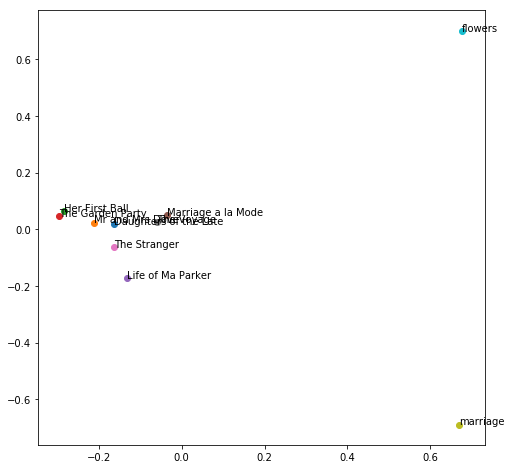

In [134]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(mansfieldLabels[i], (xs[i], ys[i]))